In [1]:
import matplotlib.pyplot as plt #type: ignore
import plotters 
import h5py #type: ignore
import os
import numpy as np #type: ignore
import sys 
sys.path.append("../code/")
import path_handler as PH #type: ignore
import StreamOrbitCoords as SOC
import data_extractors as DE #type: ignore
import gap_or_no_gap_statistics as GONGS #type: ignore

In [2]:
GCname="Pal5"
perturber="NGC3201"
potential = "pouliasis2017pii-Pal5-suspects"
PH.impact_geometry_results(GCname,perturber,potential)

'/scratch2/sferrone/intermediate-products/impact-geometry-results/pouliasis2017pii-Pal5-suspects/Pal5/Pal5-NGC3201-erkal-impact-geometry.hdf5'

In [3]:
path_to_geom_files=PH.base['impact-geometry-results']+potential+"/"+GCname+"/"

In [4]:
filenames=os.listdir(path_to_geom_files)

In [5]:
hole_punchers=GONGS.obtain_perturbers_per_monte_carlo()

In [6]:
column_names=GONGS.make_erkal_column_names_for_pandas_DF(path_to_geom_files,filenames)
data_frame=GONGS.initialize_data_frame(column_names)

In [7]:
path_to_geom_files

'/scratch2/sferrone/intermediate-products/impact-geometry-results/pouliasis2017pii-Pal5-suspects/Pal5/'

In [8]:
filename=filenames[0]
geometryfile=h5py.File(path_to_geom_files+filename,'r')

In [9]:
montecarlokeys=list(geometryfile.keys())
perturber=filename.split("-")[1]
montecarlokey=montecarlokeys[0]

In [10]:
DF=GONGS.extract_all_statistics_into_data_frame("Pal5",potential)

/obs/sferrone/stream_analysis/analysis/gap_or_no_gap_statistics.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataFrame=pd.concat([dataFrame,pd.DataFrame([dataDict])],ignore_index=True)


In [11]:
DF_numbers = DF.drop(["monte_carlo","perturber",],axis=1)

In [12]:
import seaborn as sns

/obs/sferrone/py-env-gc/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


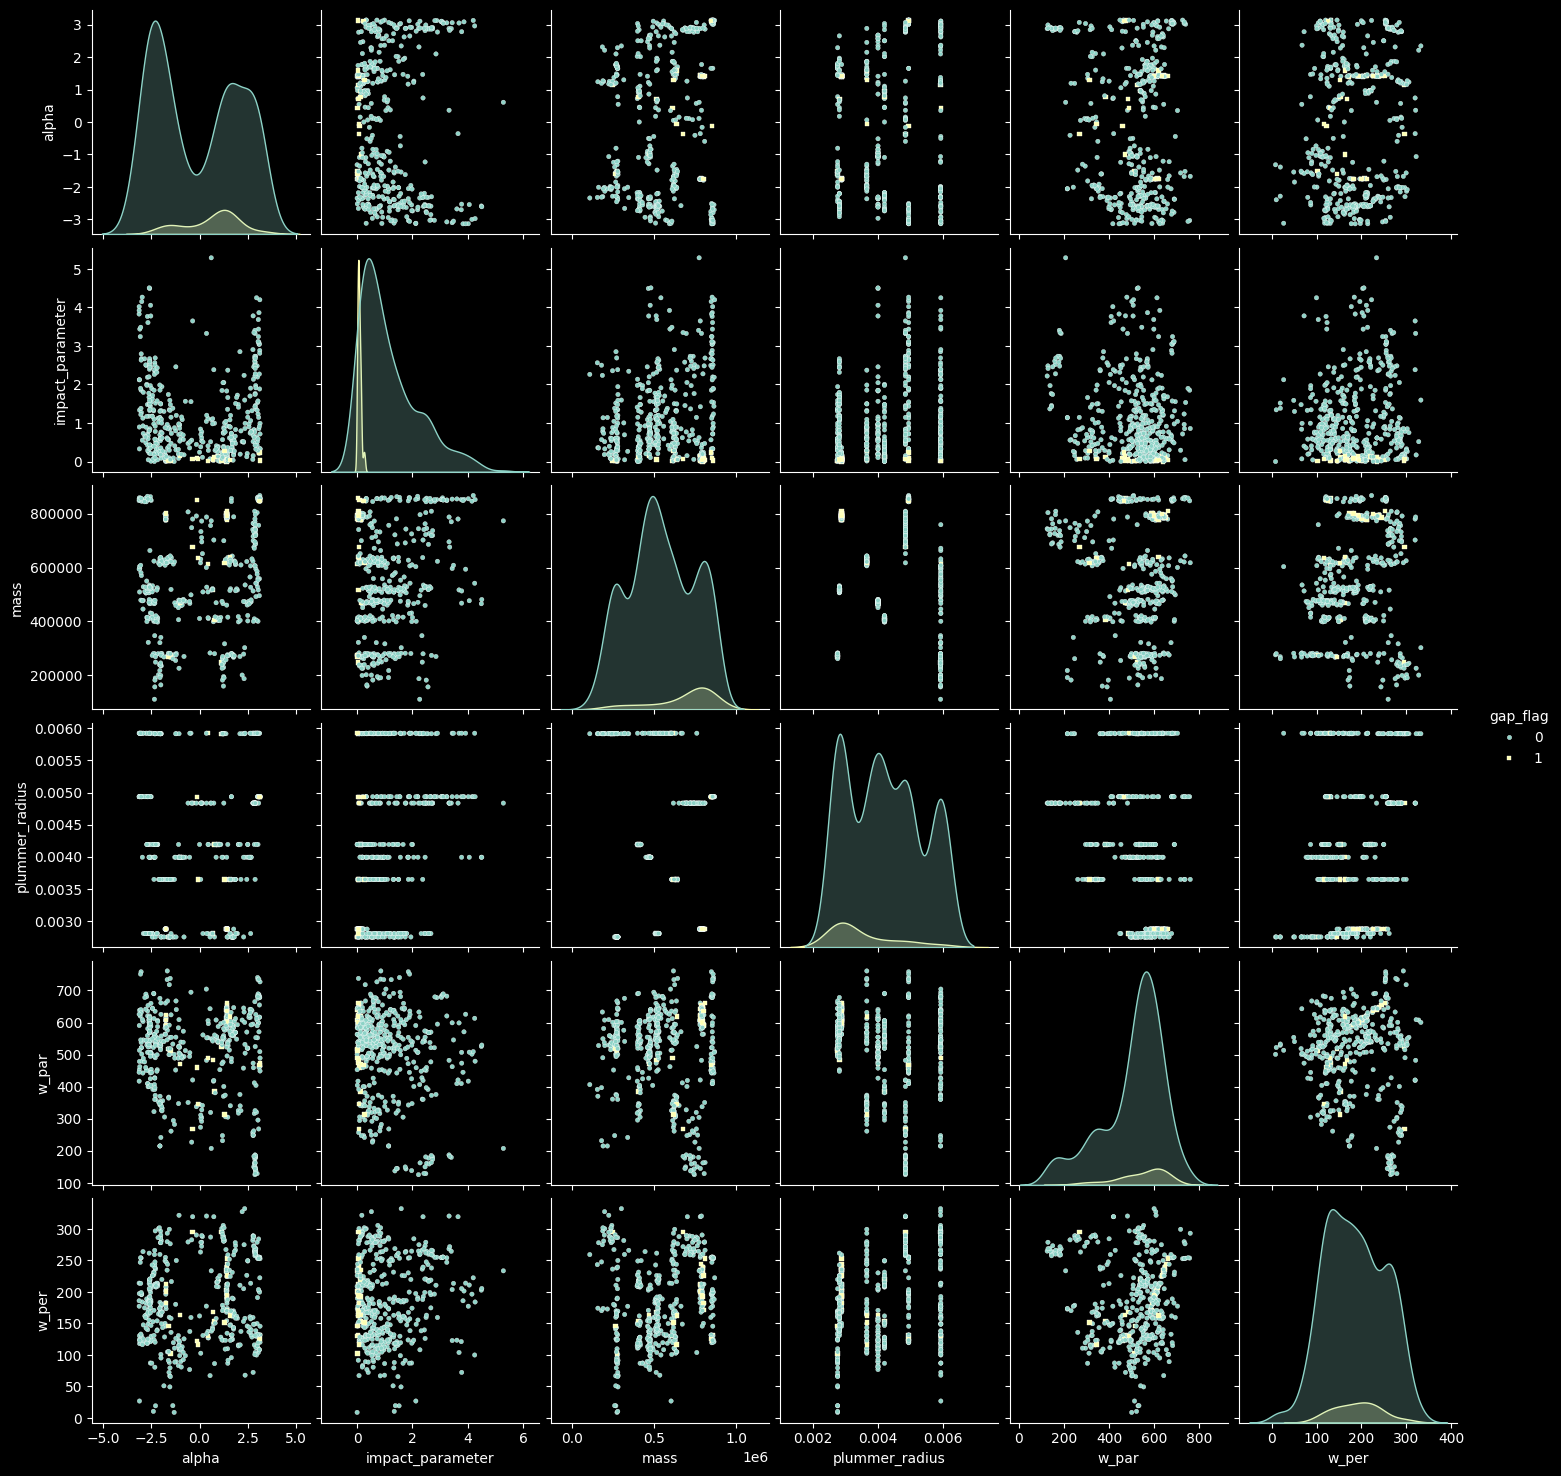

In [13]:
sns.pairplot(DF_numbers,hue="gap_flag",markers=["o","s"],plot_kws={"s":10})

In [14]:
V = np.sqrt(DF_numbers["w_par"]**2 + DF_numbers["w_per"]**2)
P = DF_numbers["mass"]*DF_numbers["impact_parameter"]/V

In [24]:
masses = DF_numbers["mass"]
impacts = DF_numbers["impact_parameter"]
data = np.vstack([masses, impacts, V]).T


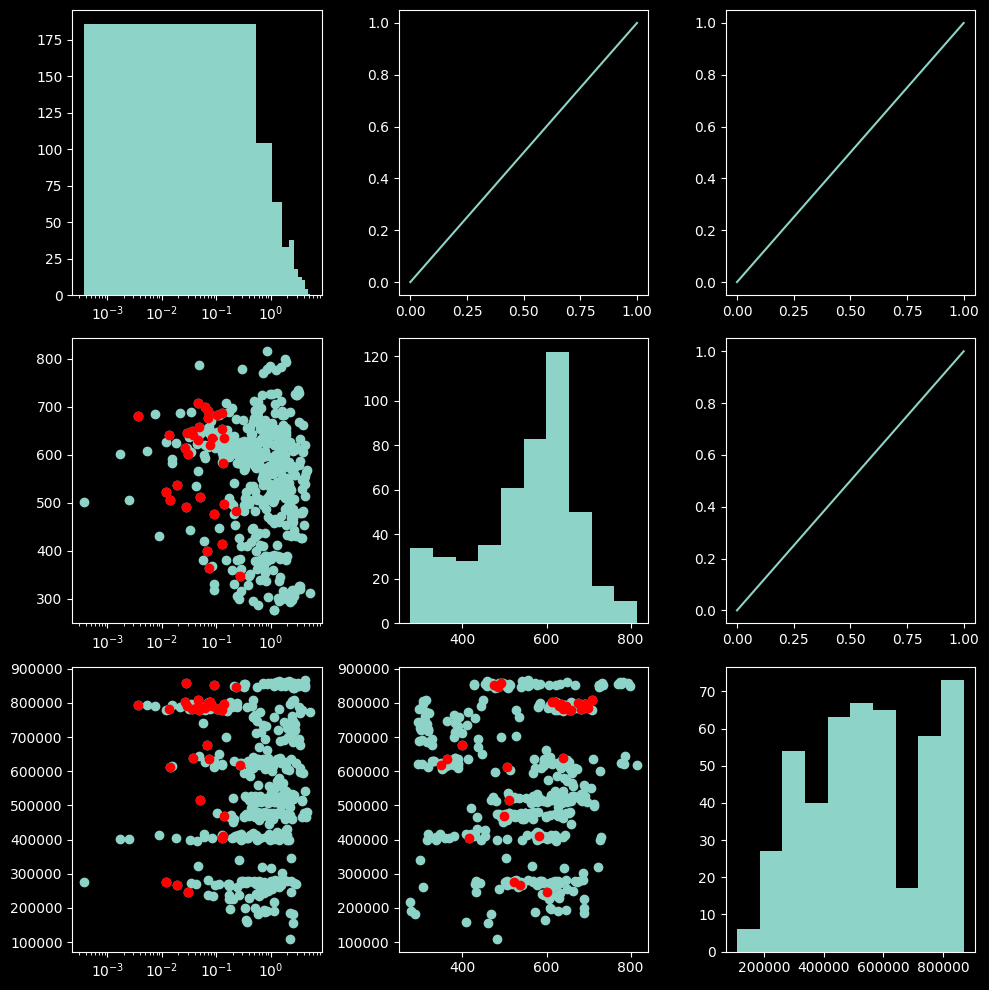

In [56]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a 3x3 grid of subplots
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3, 3, figure=fig)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])

# Plot data
# Replace with your actual data and plot commands
ax1.hist(impacts)
ax1.set_xscale("log")
ax2.plot([0, 1], [0, 1])
ax3.plot([0, 1], [0, 1])
ax4.scatter(impacts,V)
ax4.scatter(impacts[DF_numbers["gap_flag"]==1],V[DF_numbers["gap_flag"]==1],color='red')
ax4.set_xscale("log")
ax5.hist(V)
ax6.plot([0, 1], [0, 1])
ax7.scatter(impacts,masses)
ax7.scatter(impacts[DF_numbers["gap_flag"]==1],masses[DF_numbers["gap_flag"]==1],color='red')
ax7.set_xscale("log")
ax8.scatter(V,masses)
ax8.scatter(V[DF_numbers["gap_flag"]==1],masses[DF_numbers["gap_flag"]==1],color="red")
ax9.hist(masses)

plt.tight_layout()
plt.show()

In [69]:
mindexes=np.argsort(impacts)

In [72]:
mindexes=np.argsort(impacts)

for ii in range(20):
    mindex = mindexes[ii]
    print(DF["monte_carlo"][mindex],DF["perturber"][mindex],V[mindex],DF["mass"][mindex],DF["impact_parameter"][mindex])

monte-carlo-001 NGC6341 500.90153268408574 275363.7414279541 0.00036946910898589955
monte-carlo-013 NGC5272 600.7690247033375 401413.4543331108 0.0017035633796867163
monte-carlo-048 NGC5272 506.29676780477666 402422.88912351907 0.002499254816903953
monte-carlo-019 NGC2808 680.8908566597472 793874.9420697502 0.003656925179691229
monte-carlo-003 NGC2808 608.4346740689432 795197.4293774243 0.0052701052228506014
monte-carlo-047 NGC2808 684.9316205526496 792002.7565437611 0.007458187500150285
monte-carlo-019 NGC5272 430.2594752288079 412246.8339428051 0.009040745051501311
monte-carlo-022 NGC6341 523.1507034362178 274664.21091606555 0.011852437019757066
monte-carlo-001 NGC2808 626.5010822227074 779627.0138308121 0.011908871064970173
monte-carlo-022 NGC2808 640.2668095103777 783124.3127544846 0.0136778648727369
monte-carlo-044 NGC6356 505.80876100009067 613294.4193464881 0.013971445617170888
monte-carlo-026 NGC2808 581.9149762566917 792747.5083349382 0.015230026042280907
monte-carlo-005 NGC70